# `Numericle Problem Solving`
### Submitted to: `Professor X.D.Wang & Mr. Qadeer Raza`
### Submitted by:  `Nadeem Mishal`
#### Student ID: `2024180004`

In [4]:
# !pip install pandoc
# import pandoc
# !pip install nbconvert
# !pip install --upgrade pip

  Using cached pip-24.3.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-24.3.1-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
C:\Users\mirza\miniconda3\envs\python_ml\python.exe -m pip install --upgrade pip


---

### **Problem 1: Successive Over-Relaxation (SOR) Method**

#### **Problem Statement**
Solve the linear system of equations \( Ax = b \) using the **Successive Over-Relaxation (SOR)** method. The goal is to analyze the effect of different relaxation factors (\( \omega \)) on the convergence speed.

#### **Method**
The SOR method updates the solution iteratively using:
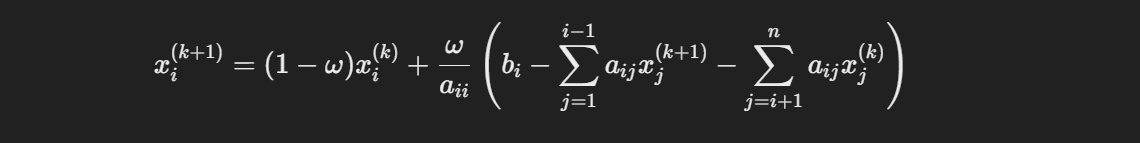
where:
- \( \omega \) is the relaxation factor (\( 0 < \omega < 2 \)).
- \( a_{ij} \) are elements of matrix \( A \).
- \( b_i \) are elements of vector \( b \).
- \( x_i^{(k)} \) is the \( i \)-th component of the solution vector at iteration \( k \).

The method continues until the difference between successive solutions satisfies a given tolerance.



In [1]:
import numpy as np

# Problem 1: Successive Over-Relaxation (SOR) Method
def problem1_sor():
    # Define parameters
    n = 50  # Matrix size
    A = np.diag(5 * np.ones(n)) + np.diag(-1 * np.ones(n - 1), 1) + np.diag(-1 * np.ones(n - 1), -1)  # Tridiagonal matrix
    b = np.ones(n)  # Right Hand Side vector
    tol = 1e-5  # Tolerance for convergence
    max_iter = 10000  # Maximum number of iterations
    omegas = [0.5, 1.0, 1.7]  # Relaxation factors

    # Iterate over relaxation factors
    for omega in omegas:
        x, iter_count = sor_method(A, b, omega, tol, max_iter)

        # Display results
        print(f'Relaxation factor: {omega}')
        print(f'Number of iterations: {iter_count}')
        print('Solution x (first 5 values):')
        print(x[:5])  # Display the first 5 values of the solution
        print('--------------------------------------------')

# SOR Method Implementation
def sor_method(A, b, omega, tol, max_iter):
    n = len(b)  # Size of the system
    x = np.zeros(n)  # Initial guess
    iter_count = 0  # Iteration counter
    converged = False

    while not converged and iter_count < max_iter:
        x_old = np.copy(x)  # Store previous solution
        for i in range(n):
            # Update x(i) using the SOR formula
            sum1 = np.dot(A[i, :i], x[:i])  # A(i, 1:i-1) * x(1:i-1)
            sum2 = np.dot(A[i, i+1:], x_old[i+1:])  # A(i, i+1:end) * x_old(i+1:end)
            x[i] = (1 - omega) * x[i] + omega * (b[i] - sum1 - sum2) / A[i, i]

        # Check for convergence
        if np.linalg.norm(x - x_old, np.inf) < tol:
            converged = True
        
        iter_count += 1  # Increment iteration count

    # If max_iter is reached without convergence
    if not converged:
        print(f'SOR method did not converge for omega = {omega}')

    return x, iter_count

# Call the main function to run the SOR method
problem1_sor()


Relaxation factor: 0.5
Number of iterations: 24
Solution x (first 5 values):
[0.26375394 0.31879908 0.33028579 0.33268228 0.33318205]
--------------------------------------------
Relaxation factor: 1.0
Number of iterations: 9
Solution x (first 5 values):
[0.26376166 0.31881189 0.33030153 0.33269955 0.33320005]
--------------------------------------------
Relaxation factor: 1.7
Number of iterations: 41
Solution x (first 5 values):
[0.26376262 0.31881308 0.33030278 0.33270082 0.33320132]
--------------------------------------------


---
#### **Discussion**
The SOR method is efficient for solving large, sparse systems of linear equations. 
- The choice of \( \omega \) significantly affects convergence. 
  - For \( \omega = 1 \), SOR reduces to the Gauss-Seidel method.
  - For \( 1 < \omega < 2 \), it often converges faster.
- The convergence depends on the spectral radius of the iteration matrix. A poor choice of \( \omega \) can lead to divergence.

---

### **Problem 2: Newton Fractals**

#### **Problem Statement**
Visualize the convergence behavior of the Newton-Raphson method applied to the equation \( z^3 - 1 = 0 \) in the complex plane. Analyze the regions of convergence for each root and the number of iterations required.

#### **Method**
1. Define the function:
   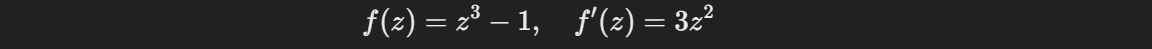
2. Apply the Newton-Raphson iteration:
   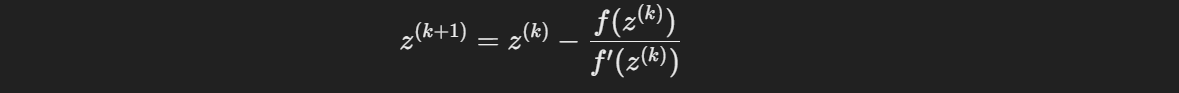
3. For a grid of initial guesses \( z_0 \) in the complex plane:
   - Iterate until the solution converges to a root or a maximum number of iterations is reached.
   - Record which root each point converges to and the number of iterations.

C:\Users\mirza\AppData\Local\Temp\ipykernel_20220\1872207602.py:23: RuntimeWarning: divide by zero encountered in divide
  Z = Z - (Z**3 - 1) / (3 * Z**2)  # Newton-Raphson formula
C:\Users\mirza\AppData\Local\Temp\ipykernel_20220\1872207602.py:23: RuntimeWarning: invalid value encountered in divide
  Z = Z - (Z**3 - 1) / (3 * Z**2)  # Newton-Raphson formula


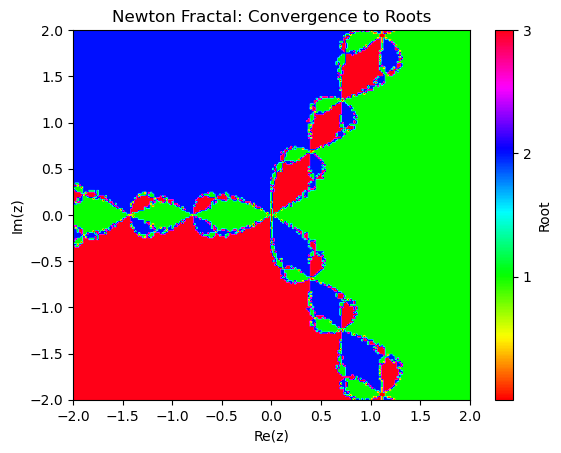

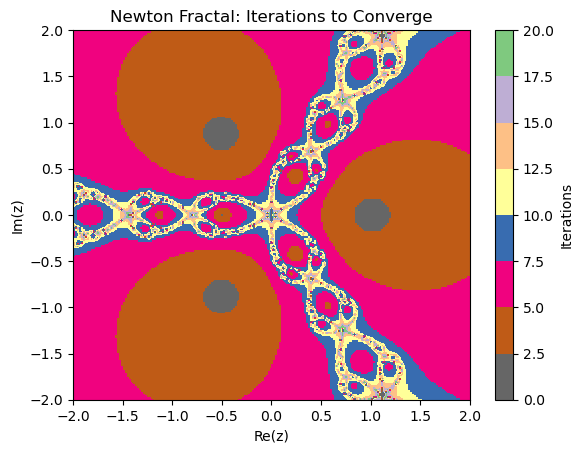

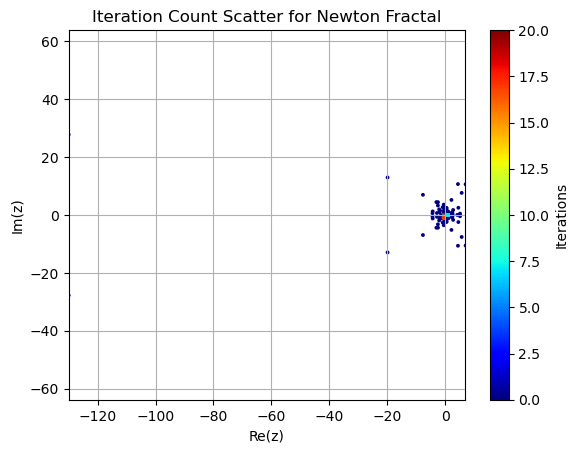

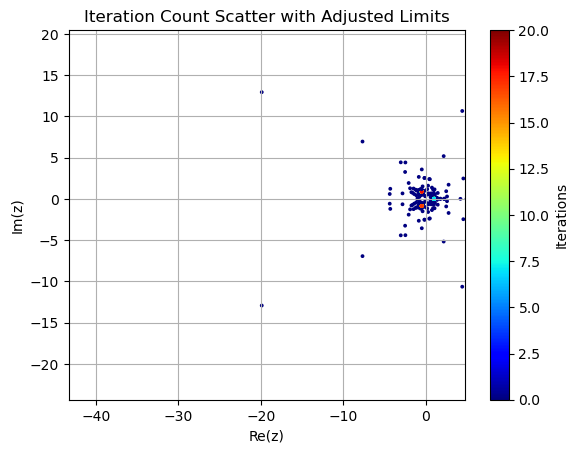

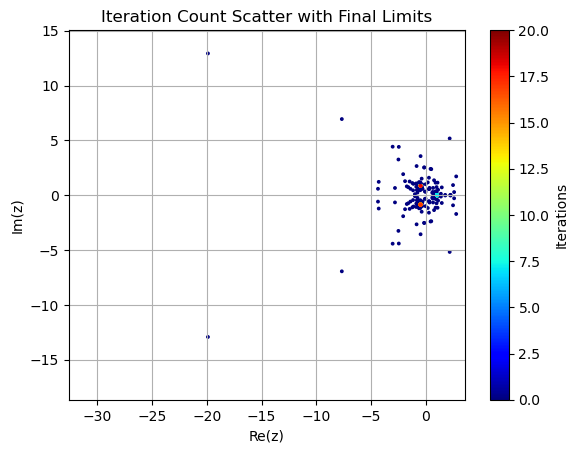

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the complex plane
x = np.linspace(-2, 2, 201)  # Real part
y = np.linspace(-2, 2, 201)  # Imaginary part
X, Y = np.meshgrid(x, y)  # 2D grid
Z = X + 1j * Y  # Initialize complex grid points

# Newton-Raphson parameters
max_iter = 20  # Maximum iterations
tol = 0.001  # Convergence tolerance
roots = [1, np.exp(2j * np.pi / 3), np.exp(-2j * np.pi / 3)]  # Roots of z^3 - 1
n_roots = len(roots)

# Initialize outputs
convergence = np.zeros(Z.shape)  # Store which root each point converges to
iterations = np.zeros(Z.shape)  # Store iteration counts

# Newton-Raphson iteration
for k in range(max_iter):
    Z_old = Z.copy()  # Store current values
    Z = Z - (Z**3 - 1) / (3 * Z**2)  # Newton-Raphson formula
    
    # Check for convergence to each root
    for r in range(n_roots):
        mask = np.abs(Z - roots[r]) < tol  # Points close to root r
        convergence[mask & (convergence == 0)] = r + 1  # Mark converged points (1-indexed)
        iterations[mask & (iterations == 0)] = k + 1  # Record iteration count (1-indexed)

# Visualization: Root Convergence (Using imagesc)
plt.figure()
plt.imshow(convergence, extent=[x[0], x[-1], y[0], y[-1]], origin='lower', cmap='hsv', aspect='auto')
plt.colorbar(ticks=range(1, n_roots + 1), label='Root')
plt.title('Newton Fractal: Convergence to Roots')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.savefig('newton_fractal_convergence.png', dpi=300)

# Visualization: Iteration Count (Using imagesc)
plt.figure()
plt.imshow(iterations, extent=[x[0], x[-1], y[0], y[-1]], origin='lower', cmap='Accent_r', aspect='auto')
plt.colorbar(label='Iterations')
plt.title('Newton Fractal: Iterations to Converge')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.savefig('newton_fractal_iterations.png', dpi=300)

# Visualization: Iteration Count with Scatter
plt.figure()
plt.scatter(np.real(Z_old), np.imag(Z_old), c=iterations.flatten(), cmap='jet', s=3)
plt.colorbar(label='Iterations')
plt.title('Iteration Count Scatter for Newton Fractal')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.axis('equal')
plt.grid(True)
plt.xlim([-130, 7])
plt.ylim([-62, 62])
plt.savefig('iteration_count_scatter1.png', dpi=300)

# Further adjusted axis limits
plt.figure()
plt.scatter(np.real(Z_old), np.imag(Z_old), c=iterations.flatten(), cmap='jet', s=3)
plt.colorbar(label='Iterations')
plt.title('Iteration Count Scatter with Adjusted Limits')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.axis('equal')
plt.grid(True)
plt.xlim([-43.3, 4.8])
plt.ylim([-23.7, 19.8])
plt.savefig('iteration_count_scatter2.png', dpi=300)

# Final adjustment for axis limits
plt.figure()
plt.scatter(np.real(Z_old), np.imag(Z_old), c=iterations.flatten(), cmap='jet', s=3)
plt.colorbar(label='Iterations')
plt.title('Iteration Count Scatter with Final Limits')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.axis('equal')
plt.grid(True)
plt.xlim([-32.6, 3.6])
plt.ylim([-18.1, 14.5])
plt.savefig('iteration_count_scatter3.png', dpi=300)

plt.show()


#### **Discussion**
The Newton fractal visualizes the chaotic and sensitive nature of the Newton-Raphson method in the complex plane:
- Points near a root converge quickly, while points further away may require more iterations or diverge.
- The boundaries between regions of convergence are fractal-like and demonstrate the sensitivity of the method to initial conditions.
- The method is not guaranteed to converge, especially for poorly chosen starting points.

---

### **Problem 3: Runge's Phenomenon and Interpolation**

#### **Problem Statement**
Analyze the interpolation of the Runge function:
using:
1. Equally spaced nodes.
2. Chebyshev nodes.

Evaluate the interpolation error and calculate the integral of \( f(x) \) over \( [-5, 5] \) using the Composite Simpson's Rule.

#### **Method**
1. **Interpolation**:
   - Fit a polynomial of degree \( n \) through the nodes using:
   - Evaluate the interpolation error:

2. **Chebyshev Nodes**:
   - Nodes are chosen to minimize error:

3. **Composite Simpson's Rule**:
   - Divide \( [-5, 5] \) into \( n \) subintervals.
   - Compute the integral:

Errors for Polynomial Interpolation:
Equally Spaced Nodes: [ 0.96151341  0.64622854  0.70698878  0.43266899  1.91563315  2.10686049
 59.76839906]
Chebyshev Nodes: [0.92590088 0.60059758 0.75027531 0.55588739 0.10915351 0.08309431
 0.01533338]
Numerical Integration Error (Simpson): 0.0002564103


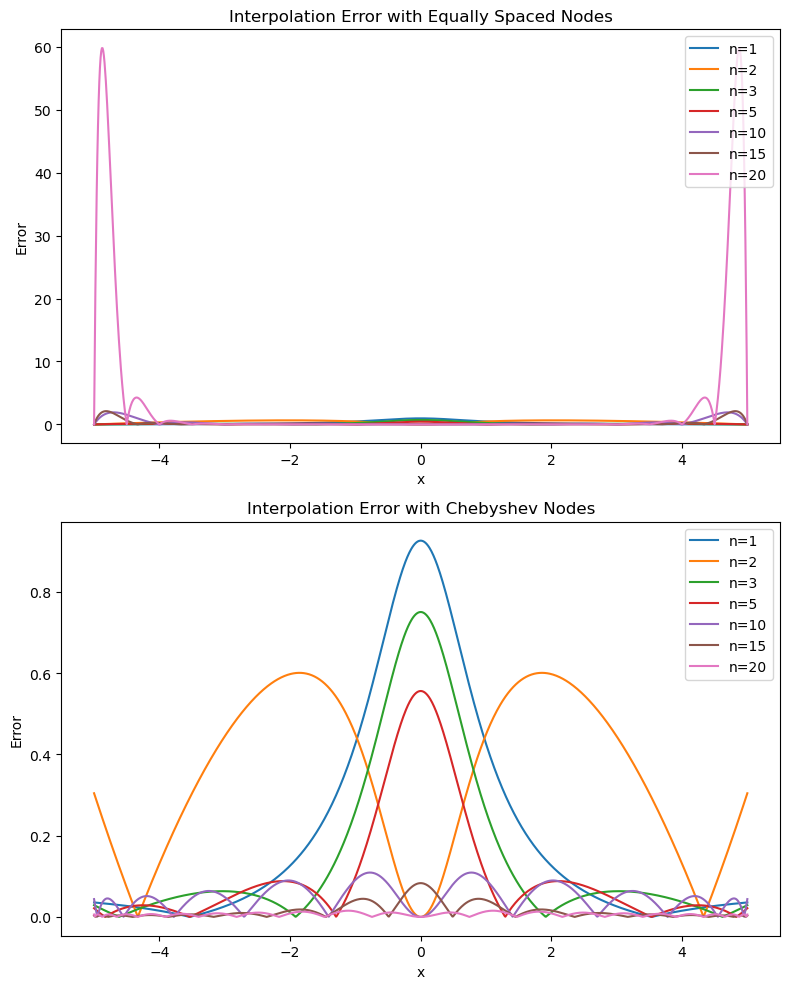

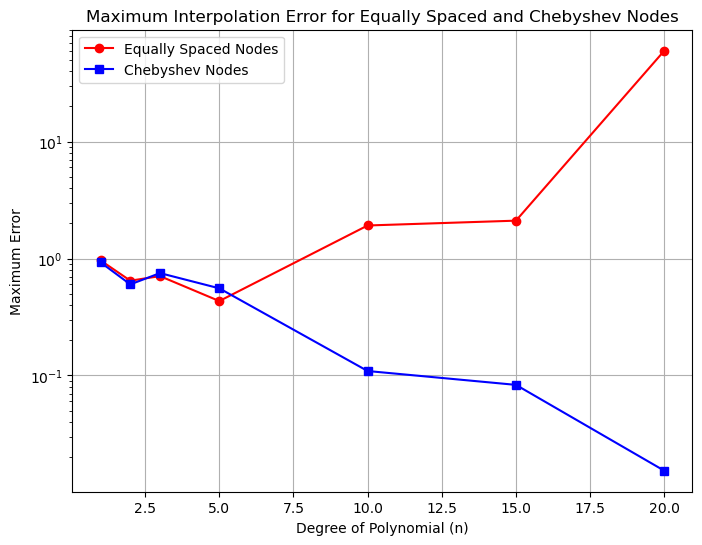

Simpson Rule Integral: 2.7470579441
Exact Integral: 2.7468015339
Absolute Error: 2.5641025571e-04


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator

# Define the Runge function
def f(x):
    return 1 / (1 + x**2)

# Define interval and number of evaluation points
x_eval = np.linspace(-5, 5, 1000)  # Points for evaluating error

# Orders of interpolation
n_values = [1, 2, 3, 5, 10, 15, 20]

# Initialize errors for equally spaced and Chebyshev nodes
errors_equally = np.zeros((len(n_values), len(x_eval)))
errors_chebyshev = np.zeros((len(n_values), len(x_eval)))
max_errors_equally = np.zeros(len(n_values))  # Maximum error for equally spaced nodes
max_errors_chebyshev = np.zeros(len(n_values))  # Maximum error for Chebyshev nodes

# Loop over polynomial degrees
for k, n in enumerate(n_values):
    # 1. Equally spaced nodes
    x_nodes_equal = np.linspace(-5, 5, n+1)
    y_nodes_equal = f(x_nodes_equal)
    
    # Barycentric interpolation for polynomial fit (alternative to polyfit in MATLAB)
    interpolator_equal = BarycentricInterpolator(x_nodes_equal, y_nodes_equal)
    f_interp_equal = interpolator_equal(x_eval)  # Evaluate interpolation
    errors_equally[k, :] = np.abs(f(x_eval) - f_interp_equal)  # Compute error
    max_errors_equally[k] = np.max(errors_equally[k, :])  # Maximum error for this n

    # 2. Chebyshev nodes
    x_nodes_cheby = 5 * np.cos((2 * (np.arange(n + 1)) + 1) * np.pi / (2 * (n + 1)))
    y_nodes_cheby = f(x_nodes_cheby)
    
    interpolator_cheby = BarycentricInterpolator(x_nodes_cheby, y_nodes_cheby)
    f_interp_cheby = interpolator_cheby(x_eval)  # Evaluate interpolation
    errors_chebyshev[k, :] = np.abs(f(x_eval) - f_interp_cheby)  # Compute error
    max_errors_chebyshev[k] = np.max(errors_chebyshev[k, :])  # Maximum error for this n

# Numerical Integration
# Analytical value for the integral
exact_value = 2 * np.arctan(5)

# Using Composite Simpson's Rule
n_intervals = 1000  # High number of intervals for accuracy
x = np.linspace(-5, 5, n_intervals + 1)
h = (x[-1] - x[0]) / n_intervals
y = f(x)
I_simpson = (h/3) * (y[0] + 4 * np.sum(y[1::2]) + 2 * np.sum(y[2::2]) + y[-1])

# Compute absolute error for integration
integration_error = np.abs(I_simpson - exact_value)

# Display Results
print('Errors for Polynomial Interpolation:')
print('Equally Spaced Nodes:', max_errors_equally)
print('Chebyshev Nodes:', max_errors_chebyshev)
print(f'Numerical Integration Error (Simpson): {integration_error:.10f}')

# Plotting interpolation errors
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Plot errors for equally spaced nodes
for k, n in enumerate(n_values):
    axs[0].plot(x_eval, errors_equally[k, :], label=f'n={n}')
axs[0].set_title('Interpolation Error with Equally Spaced Nodes')
axs[0].set_xlabel('x')
axs[0].set_ylabel('Error')
axs[0].legend(loc='upper right')

# Plot errors for Chebyshev nodes
for k, n in enumerate(n_values):
    axs[1].plot(x_eval, errors_chebyshev[k, :], label=f'n={n}')
axs[1].set_title('Interpolation Error with Chebyshev Nodes')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Error')
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

# Plot Maximum Interpolation Errors
plt.figure(figsize=(8, 6))
plt.semilogy(n_values, max_errors_equally, 'o-r', label='Equally Spaced Nodes', linewidth=1.5)
plt.semilogy(n_values, max_errors_chebyshev, 's-b', label='Chebyshev Nodes', linewidth=1.5)
plt.title('Maximum Interpolation Error for Equally Spaced and Chebyshev Nodes')
plt.xlabel('Degree of Polynomial (n)')
plt.ylabel('Maximum Error')
plt.legend()
plt.grid(True)
plt.savefig('max_interpolation_error.png', dpi=300)
plt.show()

# Display integral results
print(f'Simpson Rule Integral: {I_simpson:.10f}')
print(f'Exact Integral: {exact_value:.10f}')
print(f'Absolute Error: {integration_error:.10e}')


#### **Discussion**
- Equally spaced nodes result in **Runge's phenomenon**, where interpolation error increases at the interval edges for higher degrees.
- Chebyshev nodes significantly reduce interpolation error due to their distribution, which minimizes oscillations.
- Composite Simpson's Rule provides an accurate approximation for the integral, especially with a high number of subintervals.

---

### **Problem 4: Lorenz System**

#### **Problem Statement**
Solve the Lorenz system of ordinary differential equations (ODEs):
\[
\begin{aligned}
\frac{dx}{dt} &= \sigma (y - x), \\
\frac{dy}{dt} &= x(\rho - z) - y, \\
\frac{dz}{dt} &= xy - \beta z,
\end{aligned}
\]
using four numerical methods:
1. Forward Euler
2. Backward Euler
3. Trapezoidal Rule
4. Predictor-Corrector Method

#### **Method**
1. **Forward Euler**:
   where \( f(x) \) is the system of equations.

2. **Backward Euler** (implicit):
   Solved iteratively using a root-finding method like Newton-Raphson.

3. **Predictor-Corrector**:
   - Predictor step: Use Forward Euler to estimate \( x^{n+1} \).
   - Corrector step: Refine \( x^{n+1} \) using the Trapezoidal Rule.

Final Values at t = 50:
Forward Euler: x = 8.3501, y = 8.3668, z = 26.8149
Backward Euler: x = -8.4853, y = -8.4853, z = 27.0000
Trapezoid: x = -0.3001, y = -0.5873, z = 6.7222
Predictor-Corrector: x = -0.3001, y = -0.5873, z = 6.7222


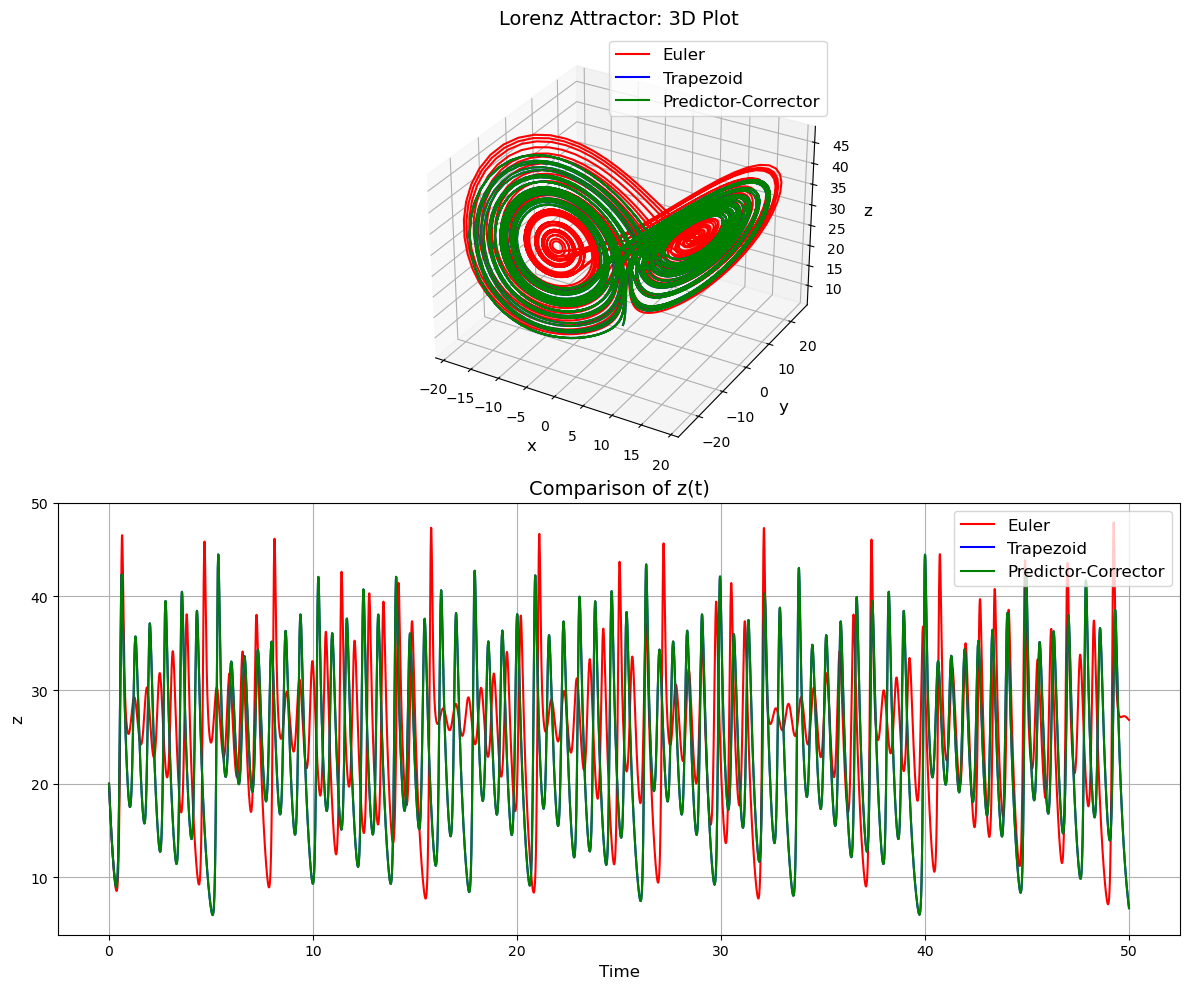

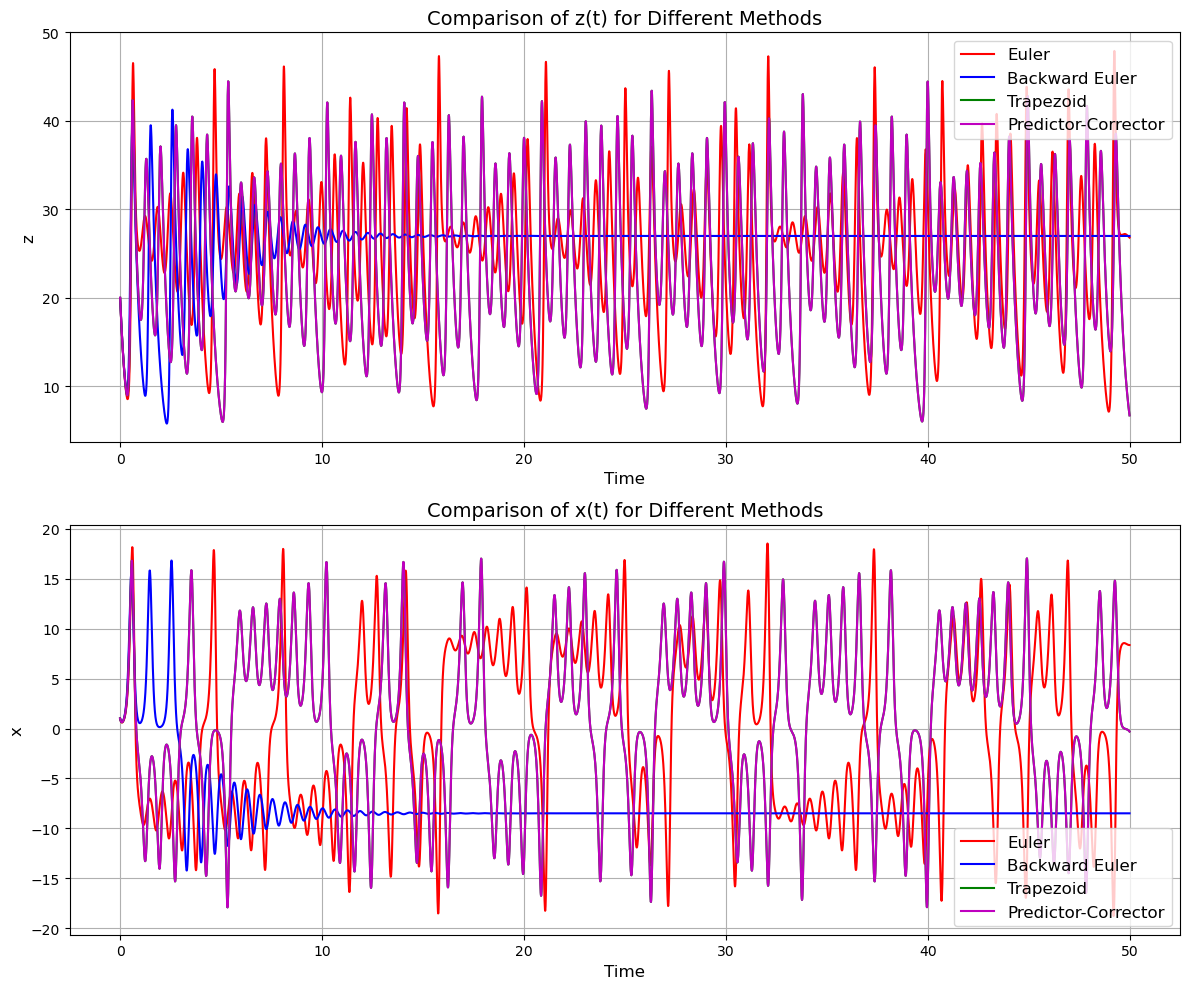

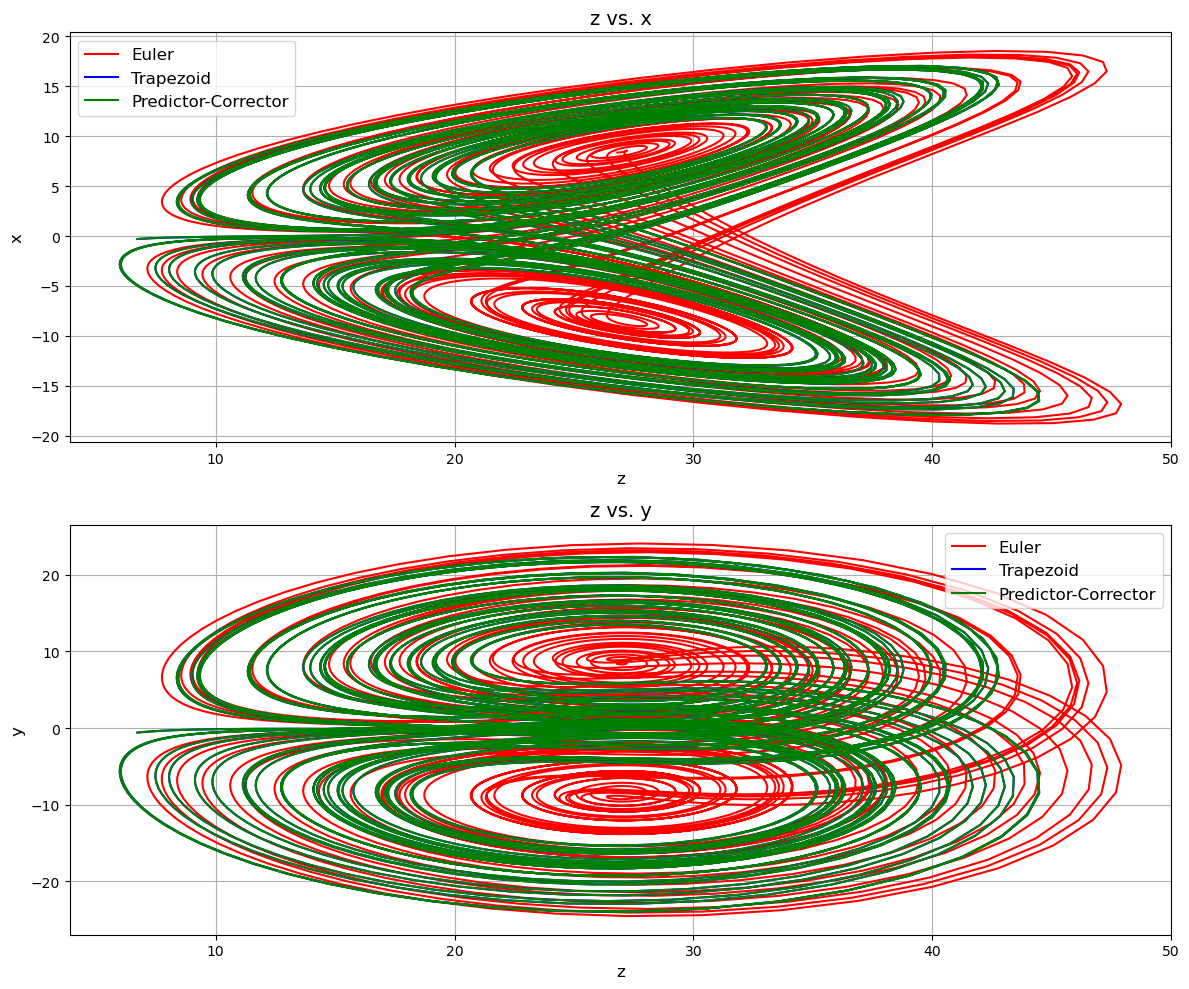

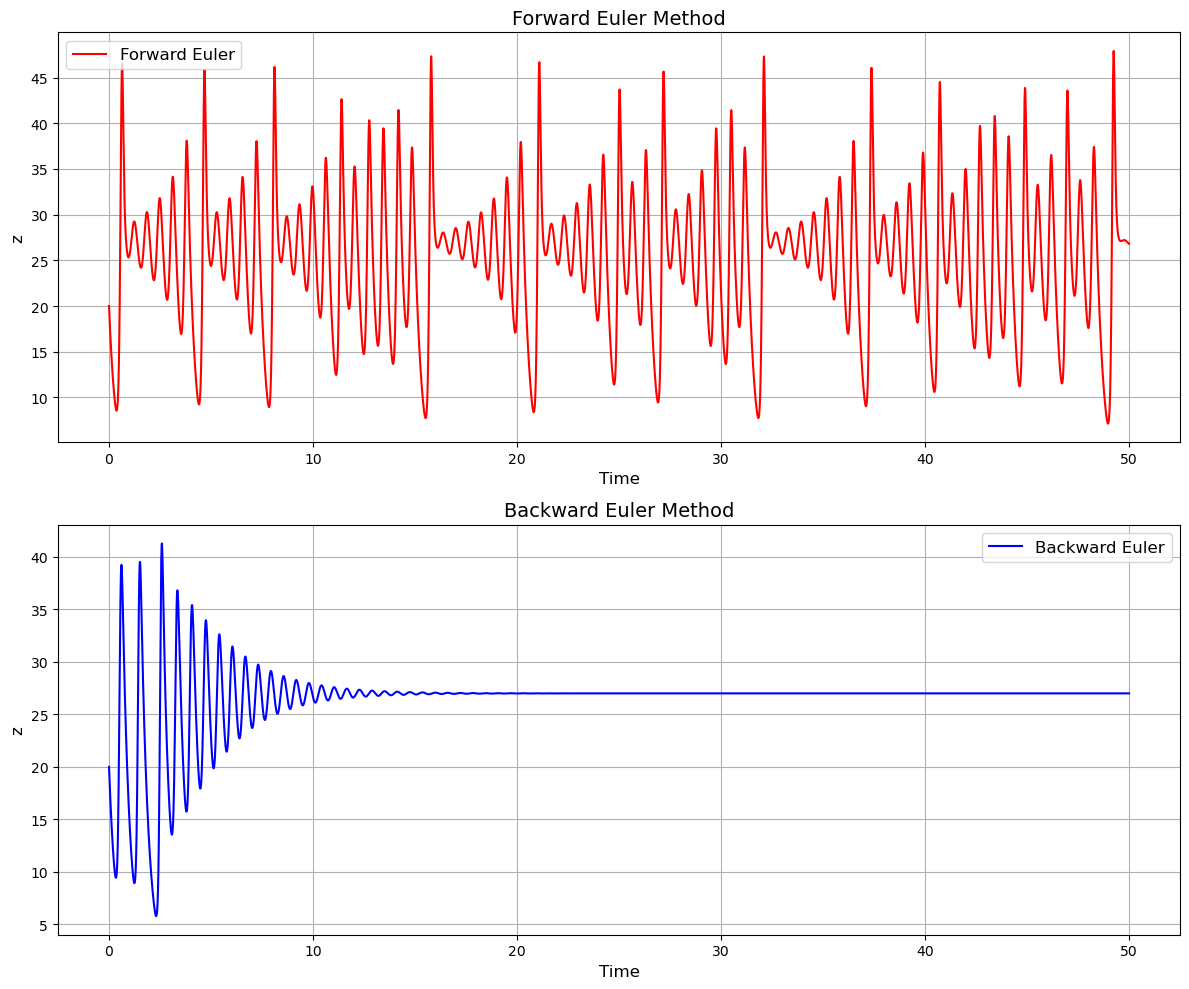

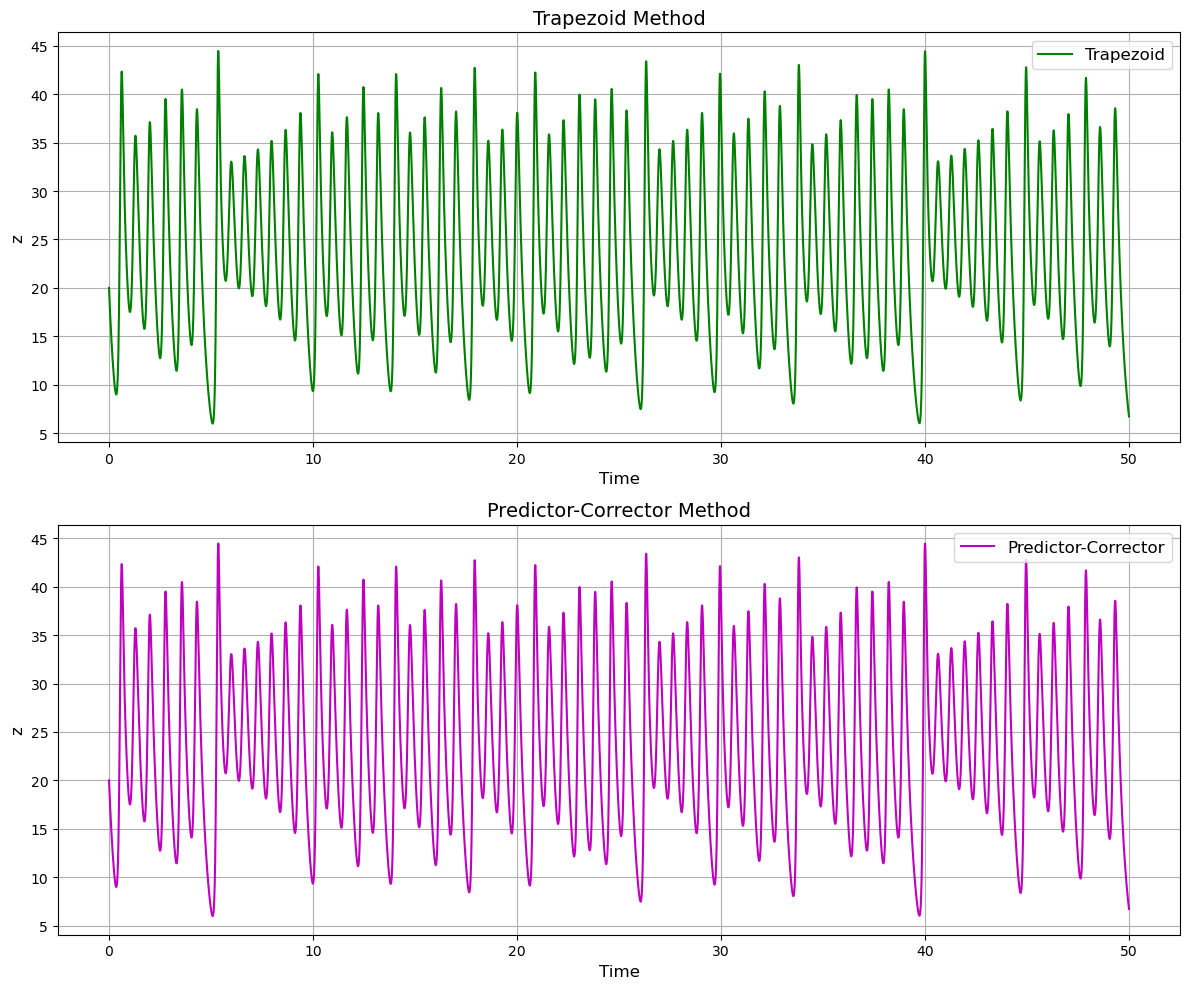

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function for Lorenz system
def lorenz(x, y, z, sigma=10, rho=28, beta=8/3):
    dx = sigma * (y - x)
    dy = rho * x - y - x * z
    dz = x * y - beta * z
    return np.array([dx, dy, dz])

# Initialize parameters
sigma = 10
rho = 28
beta = 8/3
t0 = 0
tf = 50
dt = 0.01
t = np.arange(t0, tf, dt)
n_steps = len(t)

# Initial conditions
x0, y0, z0 = 1, 0, 20

# Initialize arrays to store results
x_euler = np.zeros(n_steps)
y_euler = np.zeros(n_steps)
z_euler = np.zeros(n_steps)

x_beuler = np.zeros(n_steps)
y_beuler = np.zeros(n_steps)
z_beuler = np.zeros(n_steps)

x_trap = np.zeros(n_steps)
y_trap = np.zeros(n_steps)
z_trap = np.zeros(n_steps)

x_pc = np.zeros(n_steps)
y_pc = np.zeros(n_steps)
z_pc = np.zeros(n_steps)

# Set initial values
x_euler[0], y_euler[0], z_euler[0] = x0, y0, z0
x_beuler[0], y_beuler[0], z_beuler[0] = x0, y0, z0
x_trap[0], y_trap[0], z_trap[0] = x0, y0, z0
x_pc[0], y_pc[0], z_pc[0] = x0, y0, z0

# Forward Euler Method
for i in range(n_steps - 1):
    dx = lorenz(x_euler[i], y_euler[i], z_euler[i])
    x_euler[i + 1] = x_euler[i] + dt * dx[0]
    y_euler[i + 1] = y_euler[i] + dt * dx[1]
    z_euler[i + 1] = z_euler[i] + dt * dx[2]

# Backward Euler Method (iterative solver)
for i in range(n_steps - 1):
    x_guess, y_guess, z_guess = x_beuler[i], y_beuler[i], z_beuler[i]
    for _ in range(10):
        dx = lorenz(x_guess, y_guess, z_guess)
        x_next = x_beuler[i] + dt * dx[0]
        y_next = y_beuler[i] + dt * dx[1]
        z_next = z_beuler[i] + dt * dx[2]
        if np.linalg.norm([x_next - x_guess, y_next - y_guess, z_next - z_guess]) < 1e-6:
            break
        x_guess, y_guess, z_guess = x_next, y_next, z_next
    x_beuler[i + 1] = x_next
    y_beuler[i + 1] = y_next
    z_beuler[i + 1] = z_next

# Trapezoid Method
for i in range(n_steps - 1):
    dx1 = lorenz(x_trap[i], y_trap[i], z_trap[i])
    x_pred = x_trap[i] + dt * dx1[0]
    y_pred = y_trap[i] + dt * dx1[1]
    z_pred = z_trap[i] + dt * dx1[2]
    dx2 = lorenz(x_pred, y_pred, z_pred)
    x_trap[i + 1] = x_trap[i] + dt * (dx1[0] + dx2[0]) / 2
    y_trap[i + 1] = y_trap[i] + dt * (dx1[1] + dx2[1]) / 2
    z_trap[i + 1] = z_trap[i] + dt * (dx1[2] + dx2[2]) / 2

# Predictor-Corrector Method
for i in range(n_steps - 1):
    dx1 = lorenz(x_pc[i], y_pc[i], z_pc[i])
    x_pred = x_pc[i] + dt * dx1[0]
    y_pred = y_pc[i] + dt * dx1[1]
    z_pred = z_pc[i] + dt * dx1[2]
    dx2 = lorenz(x_pred, y_pred, z_pred)
    x_pc[i + 1] = x_pc[i] + dt * (dx1[0] + dx2[0]) / 2
    y_pc[i + 1] = y_pc[i] + dt * (dx1[1] + dx2[1]) / 2
    z_pc[i + 1] = z_pc[i] + dt * (dx1[2] + dx2[2]) / 2

# Numerical Outputs for Comparison
print(f'Final Values at t = 50:')
print(f'Forward Euler: x = {x_euler[-1]:.4f}, y = {y_euler[-1]:.4f}, z = {z_euler[-1]:.4f}')
print(f'Backward Euler: x = {x_beuler[-1]:.4f}, y = {y_beuler[-1]:.4f}, z = {z_beuler[-1]:.4f}')
print(f'Trapezoid: x = {x_trap[-1]:.4f}, y = {y_trap[-1]:.4f}, z = {z_trap[-1]:.4f}')
print(f'Predictor-Corrector: x = {x_pc[-1]:.4f}, y = {y_pc[-1]:.4f}, z = {z_pc[-1]:.4f}')

# Plot Results with Enhanced Aesthetics
# plt.style.use('seaborn-bright')  # Set a nice style for the plots

# 3D Lorenz Attractor
fig = plt.figure(figsize=(12, 10))

ax1 = fig.add_subplot(211, projection='3d')
ax1.plot(x_euler, y_euler, z_euler, 'r-', label='Euler', linewidth=1.5)
ax1.plot(x_trap, y_trap, z_trap, 'b-', label='Trapezoid', linewidth=1.5)
ax1.plot(x_pc, y_pc, z_pc, 'g-', label='Predictor-Corrector', linewidth=1.5)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_zlabel('z', fontsize=12)
ax1.set_title('Lorenz Attractor: 3D Plot', fontsize=14)
ax1.legend(loc='upper right', fontsize=12)
ax1.grid(True)

# z(t) for all methods
fig.add_subplot(212)
plt.plot(t, z_euler, 'r-', label='Euler', linewidth=1.5)
plt.plot(t, z_trap, 'b-', label='Trapezoid', linewidth=1.5)
plt.plot(t, z_pc, 'g-', label='Predictor-Corrector', linewidth=1.5)
plt.xlabel('Time', fontsize=12)
plt.ylabel('z', fontsize=12)
plt.title('Comparison of z(t)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

# Overlay z(t) and x(t) for all methods
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# z(t) Comparison for different methods
axes[0].plot(t, z_euler, 'r-', label='Euler', linewidth=1.5)
axes[0].plot(t, z_beuler, 'b-', label='Backward Euler', linewidth=1.5)
axes[0].plot(t, z_trap, 'g-', label='Trapezoid', linewidth=1.5)
axes[0].plot(t, z_pc, 'm-', label='Predictor-Corrector', linewidth=1.5)
axes[0].set_title('Comparison of z(t) for Different Methods', fontsize=14)
axes[0].set_xlabel('Time', fontsize=12)
axes[0].set_ylabel('z', fontsize=12)
axes[0].legend(fontsize=12)
axes[0].grid(True)

# x(t) Comparison for different methods
axes[1].plot(t, x_euler, 'r-', label='Euler', linewidth=1.5)
axes[1].plot(t, x_beuler, 'b-', label='Backward Euler', linewidth=1.5)
axes[1].plot(t, x_trap, 'g-', label='Trapezoid', linewidth=1.5)
axes[1].plot(t, x_pc, 'm-', label='Predictor-Corrector', linewidth=1.5)
axes[1].set_title('Comparison of x(t) for Different Methods', fontsize=14)
axes[1].set_xlabel('Time', fontsize=12)
axes[1].set_ylabel('x', fontsize=12)
axes[1].legend(fontsize=12)
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Additional figure for z vs. x and z vs. y
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# z vs x
axes[0].plot(z_euler, x_euler, 'r-', label='Euler', linewidth=1.5)
axes[0].plot(z_trap, x_trap, 'b-', label='Trapezoid', linewidth=1.5)
axes[0].plot(z_pc, x_pc, 'g-', label='Predictor-Corrector', linewidth=1.5)
axes[0].set_title('z vs. x', fontsize=14)
axes[0].set_xlabel('z', fontsize=12)
axes[0].set_ylabel('x', fontsize=12)
axes[0].legend(fontsize=12)
axes[0].grid(True)

# z vs y
axes[1].plot(z_euler, y_euler, 'r-', label='Euler', linewidth=1.5)
axes[1].plot(z_trap, y_trap, 'b-', label='Trapezoid', linewidth=1.5)
axes[1].plot(z_pc, y_pc, 'g-', label='Predictor-Corrector', linewidth=1.5)
axes[1].set_title('z vs. y', fontsize=14)
axes[1].set_xlabel('z', fontsize=12)
axes[1].set_ylabel('y', fontsize=12)
axes[1].legend(fontsize=12)
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Additional figures for method-specific plots (z vs time)
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Forward Euler Method
axes[0].plot(t, z_euler, 'r-', linewidth=1.5)
axes[0].set_title('Forward Euler Method', fontsize=14)
axes[0].set_xlabel('Time', fontsize=12)
axes[0].set_ylabel('z', fontsize=12)
axes[0].legend(['Forward Euler'], fontsize=12)
axes[0].grid(True)

# Backward Euler Method
axes[1].plot(t, z_beuler, 'b-', linewidth=1.5)
axes[1].set_title('Backward Euler Method', fontsize=14)
axes[1].set_xlabel('Time', fontsize=12)
axes[1].set_ylabel('z', fontsize=12)
axes[1].legend(['Backward Euler'], fontsize=12)
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Figure for Trapezoid and Predictor-Corrector Methods
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Trapezoid Method
axes[0].plot(t, z_trap, 'g-', linewidth=1.5)
axes[0].set_title('Trapezoid Method', fontsize=14)
axes[0].set_xlabel('Time', fontsize=12)
axes[0].set_ylabel('z', fontsize=12)
axes[0].legend(['Trapezoid'], fontsize=12)
axes[0].grid(True)

# Predictor-Corrector Method
axes[1].plot(t, z_pc, 'm-', linewidth=1.5)
axes[1].set_title('Predictor-Corrector Method', fontsize=14)
axes[1].set_xlabel('Time', fontsize=12)
axes[1].set_ylabel('z', fontsize=12)
axes[1].legend(['Predictor-Corrector'], fontsize=12)
axes[1].grid(True)

plt.tight_layout()
plt.show()

#### **Discussion**
- The Forward Euler method is simple but less accurate for stiff systems.
- Backward Euler is more stable for stiff systems but computationally expensive.
- The Trapezoidal Rule strikes a balance between stability and accuracy.
- The Predictor-Corrector method improves accuracy by combining explicit and implicit methods.
- Visualizing trajectories and attractors highlights the chaotic nature of the Lorenz system.
---